In [15]:
import os
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

List the files in the country of origin data.

In [16]:
root = pathlib.Path("data") / "census2021-ts004"
os.listdir(root)

['census2021-ts004-llta.csv',
 'census2021-ts004-rgn.csv',
 'census2021-ts004-msoa.csv',
 'census2021-ts004-ctry.csv',
 'census2021-ts004-ulta.csv',
 'census2021-ts004-lsoa.csv',
 'census2021-ts004-oa.csv',
 'metadata']

Load the regional data.

In [19]:
df = pd.read_csv(root / "census2021-ts004-rgn.csv")
df.head()

,date,geography,geography code,Country of birth: Total; measures: Value,Country of birth: Europe; measures: Value,Country of birth: Europe: United Kingdom; measures: Value,Country of birth: Europe: EU countries; measures: Value,Country of birth: Europe: EU countries: European Union EU14; measures: Value,Country of birth: Europe: EU countries: European Union EU8; measures: Value,Country of birth: Europe: EU countries: European Union EU2; measures: Value,Country of birth: Europe: EU countries: All other EU countries; measures: Value,Country of birth: Europe: Non-EU countries; measures: Value,Country of birth: Europe: Non-EU countries: All other non-EU countries; measures: Value,Country of birth: Africa; measures: Value,Country of birth: Middle East and Asia; measures: Value,Country of birth: The Americas and the Caribbean; measures: Value,Country of birth: Antarctica and Oceania (including Australasia) and Other; measures: Value,Country of birth: British Overseas ; measures: Value
0,2021,North East,E12000001,2647013,2536430,2467870,61727,30080,20355,8981,2311,6833,6833,26473,71693,9171,2973,273
1,2021,North West,E12000002,7417399,6885187,6551993,305712,139892,115979,43717,6124,27482,27482,128962,347989,43345,10035,1881
2,2021,Yorkshire and The Humber,E12000003,5480774,5117879,4858514,240412,78153,119411,37722,5126,18953,18953,83583,241324,28969,7725,1294
3,2021,East Midlands,E12000004,4880054,4520575,4210674,281145,87123,134195,53134,6693,28756,28756,109189,209919,31681,7006,1684
4,2021,West Midlands,E12000005,5950759,5373979,5048322,300823,117983,111088,66232,5520,24834,24834,132413,382278,51874,7446,2769


Find the number of people in the Midlands that were born in Europe.

In [28]:
df.loc[
    df["geography"].isin(["North East", "North West"]),
    "Country of birth: Europe; measures: Value"
].sum()

9421617

Find the number of people in the Midlands that were born in the Midlands.

In [29]:
df.loc[
    df["geography"].isin(["East Midlands", "West Midlands"]),
    "Country of birth: Europe; measures: Value"
].sum()

9894554

Get the Nort West demographic data into a Pandas Dataframe.

In [86]:
north_west_data = (
    df.loc[
        df["geography"] == "North West",
        df.columns.drop(
            ["date", "geography", "geography code", "Country of birth: Total; measures: Value"]
        )
    ]
    .squeeze()
    .to_frame("Population")
    .reset_index(names="Origin")
)

north_west_data

,Origin,Population
0,Country of birth: Europe; measures: Value,6885187
1,Country of birth: Europe: United Kingdom; meas...,6551993
2,Country of birth: Europe: EU countries; measur...,305712
3,Country of birth: Europe: EU countries: Europe...,139892
4,Country of birth: Europe: EU countries: Europe...,115979
5,Country of birth: Europe: EU countries: Europe...,43717
6,Country of birth: Europe: EU countries: All ot...,6124
7,Country of birth: Europe: Non-EU countries; me...,27482
8,Country of birth: Europe: Non-EU countries: Al...,27482
9,Country of birth: Africa; measures: Value,128962


The strings in the origin column are long and hard to understand. They can be simplified by removing the `Country of birth` start and the part after the semicolon.

In [87]:
north_west_data["Origin"] = (
    north_west_data["Origin"].str.split(";")
    .apply(lambda x: x[0])
    .str.replace("Country of birth: ", " ")
)

north_west_data

,Origin,Population
0,Europe,6885187
1,Europe: United Kingdom,6551993
2,Europe: EU countries,305712
3,Europe: EU countries: European Union EU14,139892
4,Europe: EU countries: European Union EU8,115979
5,Europe: EU countries: European Union EU2,43717
6,Europe: EU countries: All other EU countries,6124
7,Europe: Non-EU countries,27482
8,Europe: Non-EU countries: All other non-EU co...,27482
9,Africa,128962


Plot a barplot of the populations.

/var/folders/4m/k8v4qbvs2qx5bygbcnt4nn240000gq/T/ipykernel_17576/430144364.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(north_west_data["Origin"], rotation=60, ha="right");


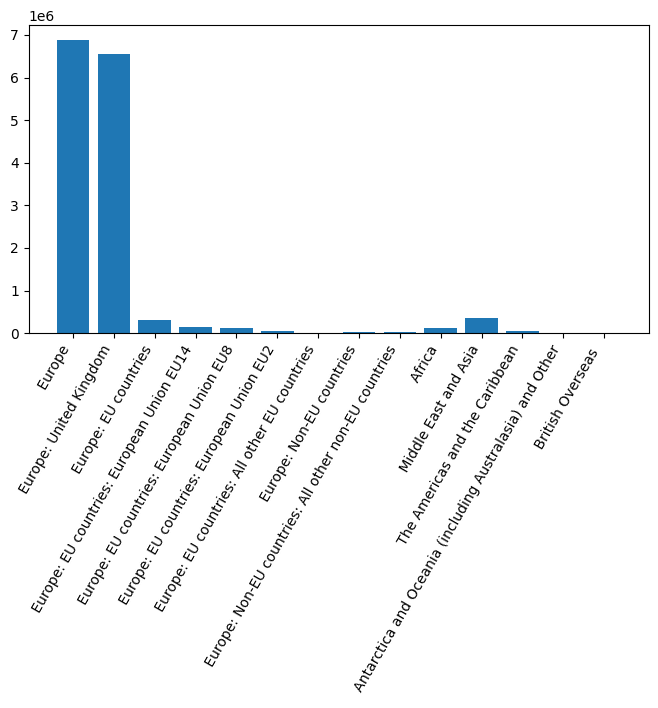

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.bar(x=north_west_data["Origin"], height=north_west_data["Population"])
ax.set_xticklabels(north_west_data["Origin"], rotation=60, ha="right");
ax.set_ylabel("Population")
ax.set_xlabel("Origin")